<a href="https://colab.research.google.com/github/saketwagh/Credit-Card-Fraud-Detection/blob/main/MLEndCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_train_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
# import tensorflow as tf
# print("TensorFlow version:", tf.__version__)
# import keras


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datacredit/creditcard_2023.csv')

In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# **Inspecting the Data**

In [ ]:
df.shape

(568630, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Checking for the null values**

In [ ]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Plotting the graph for 'Class' column**

<Axes: xlabel='Class', ylabel='count'>

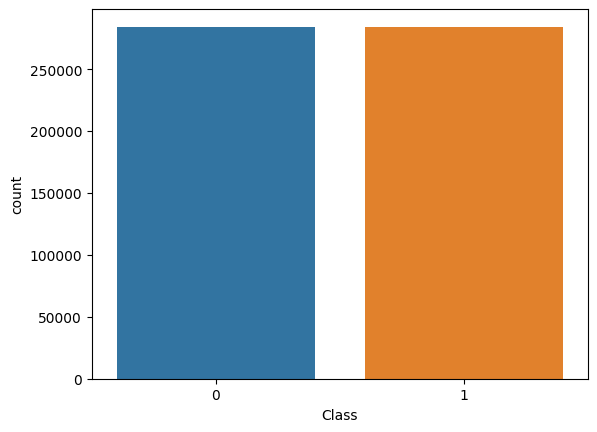

In [ ]:
sns.countplot(x='Class',  data=df)

**In the above Barplot we can conclude that our data is balanced.**

**Scaling the 'Amount' column as there are variations**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Amount']= scaler.fit_transform(df[['Amount']])

<ipython-input-13-adb1fa616d19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Class'])


<Axes: xlabel='Class', ylabel='Density'>

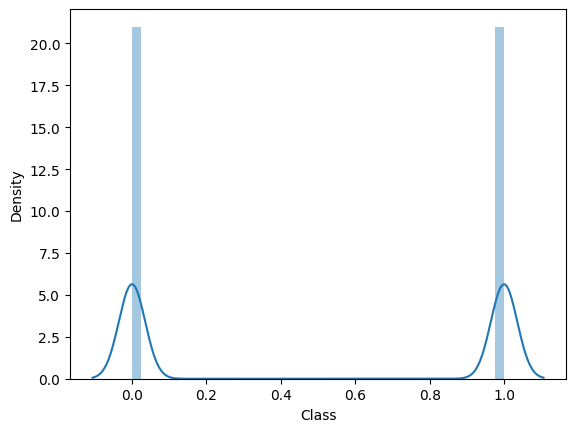

In [ ]:
sns.distplot(df['Class'])

**Finding the Correlation w.r.to our target column**

In [ ]:
corr= df.corr()

In [ ]:
corr

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


**Plotting the Heatmap for Correlations**

<Axes: >

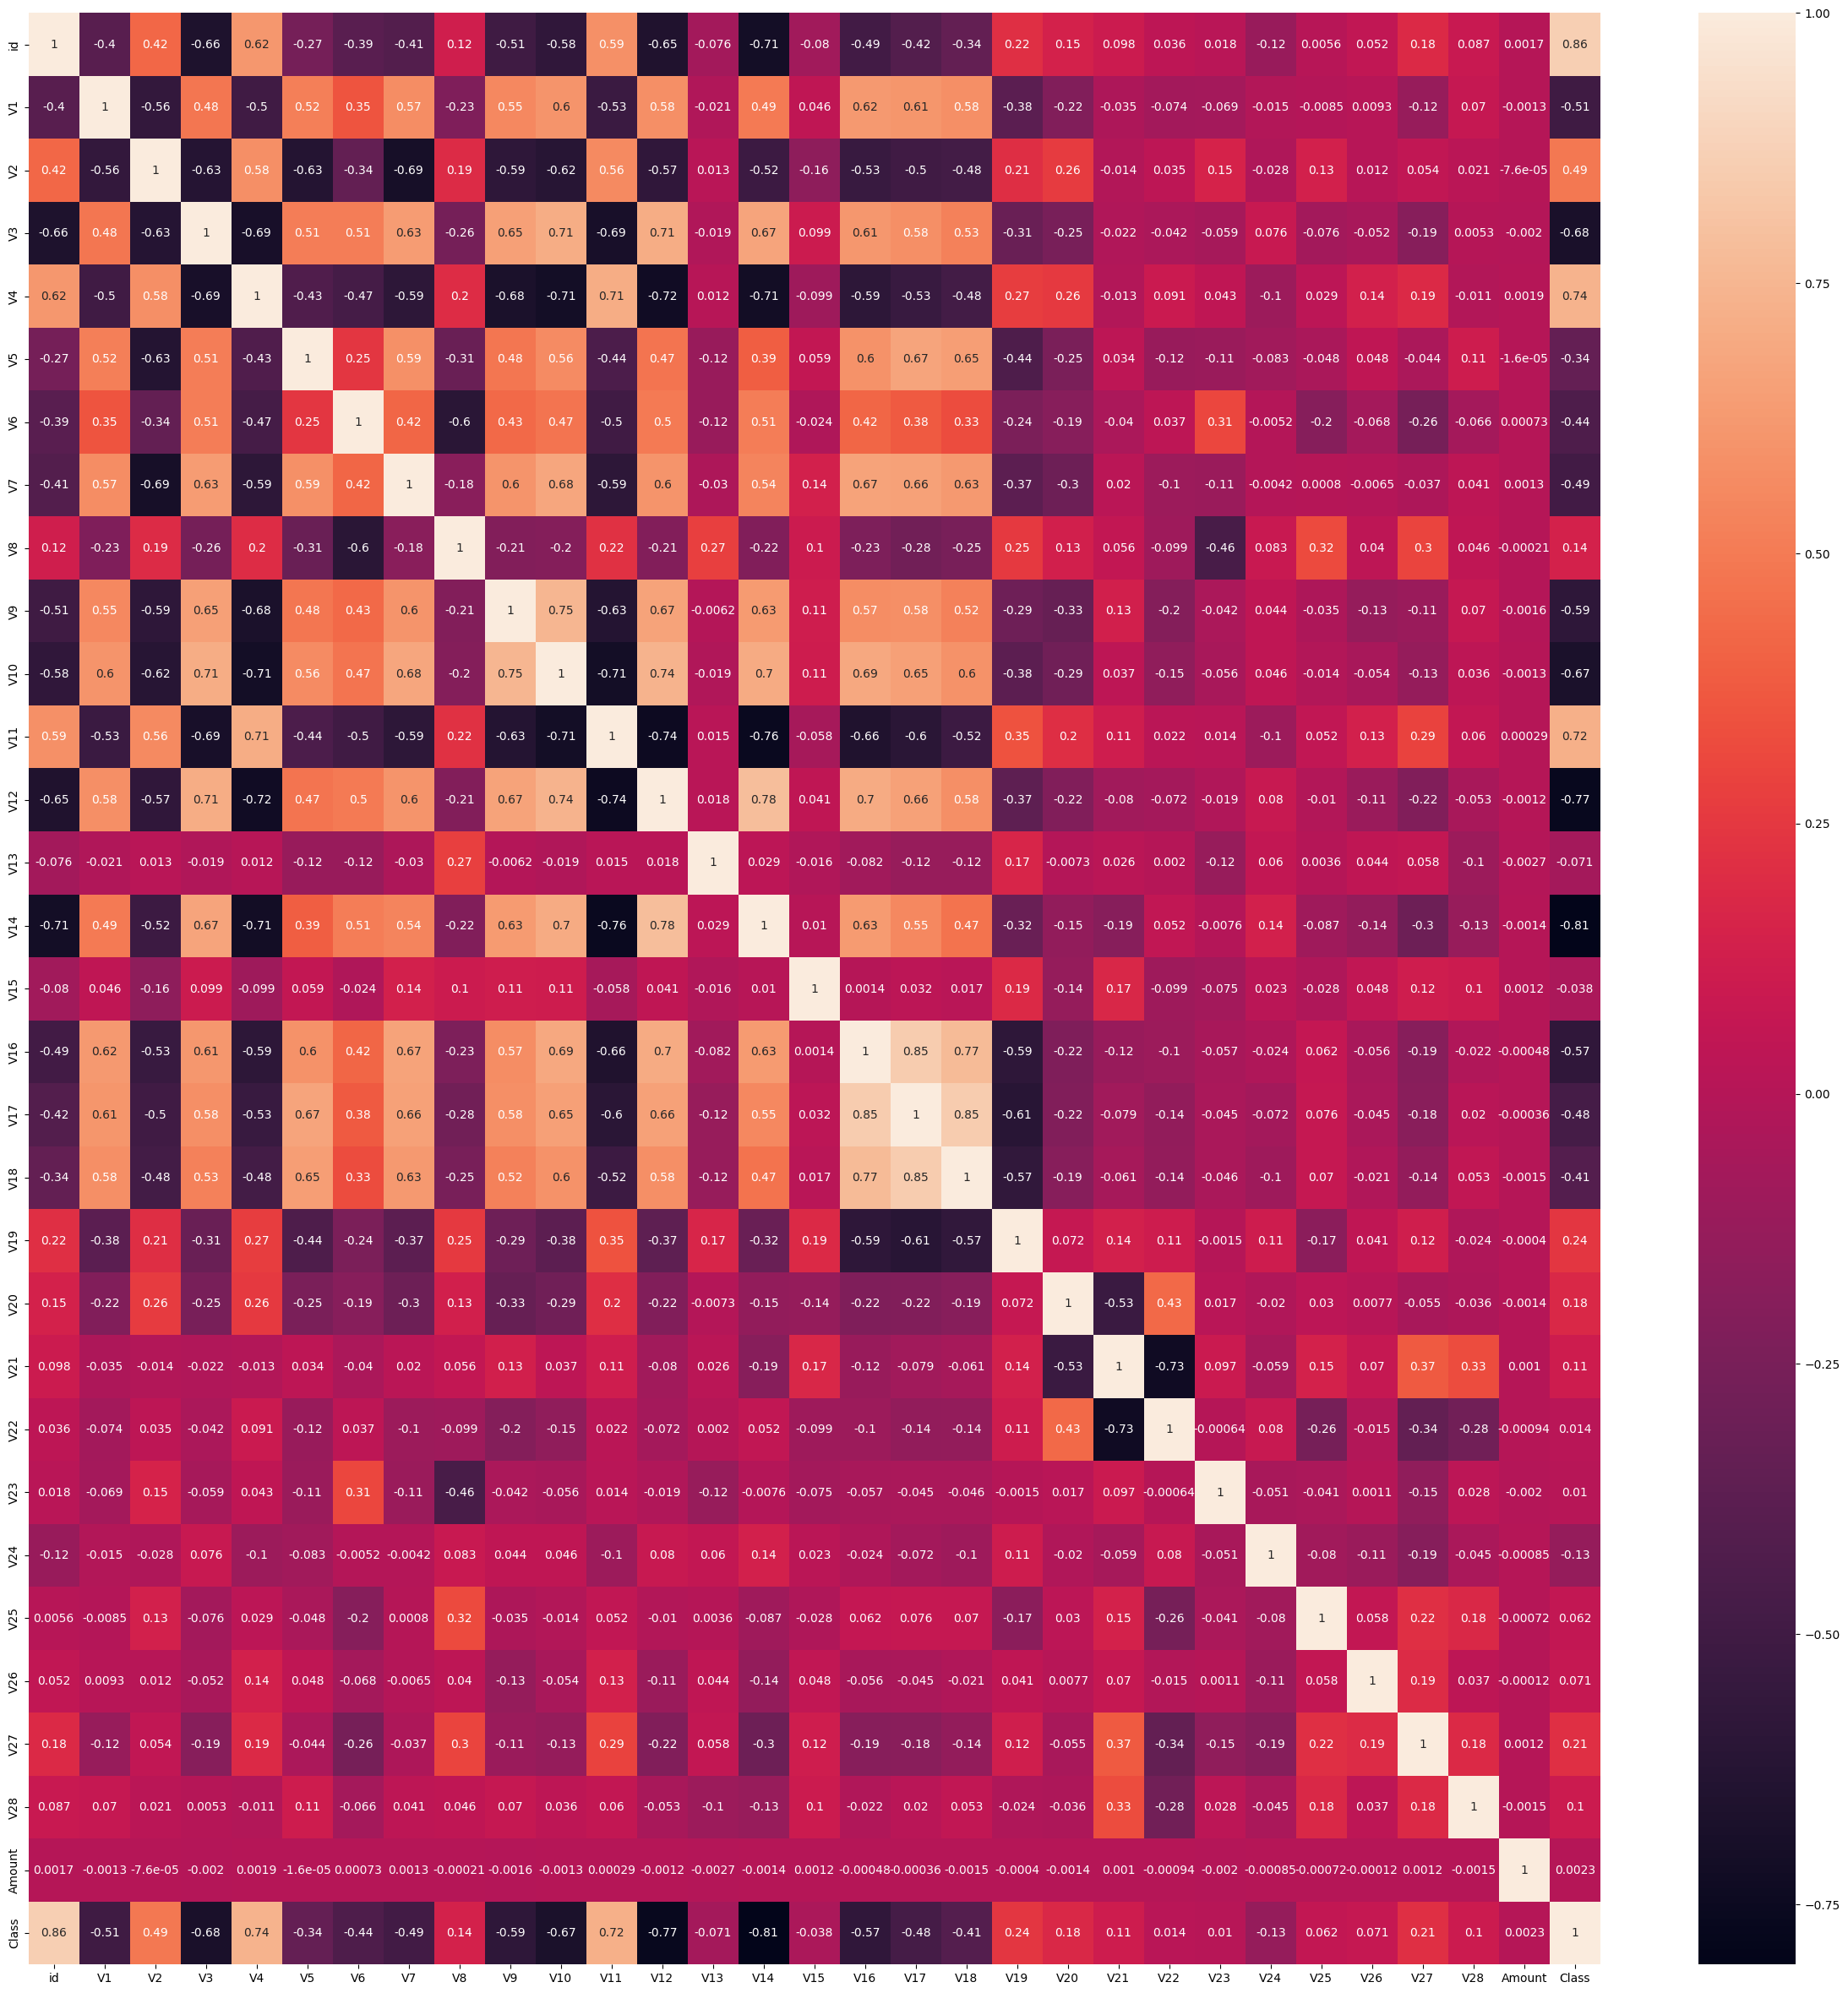

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)

**Applying the abs() functions to corr so that it will make be easier to select the features**

In [ ]:
corr.abs()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.395741,0.424267,0.663655,0.617554,0.268445,0.387916,0.414288,0.121282,0.508427,...,0.097948,0.036106,0.017594,0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,0.395741,1.000000,0.561184,0.484499,0.498963,0.517462,0.354728,0.573381,0.226757,0.548973,...,0.034669,0.073729,0.068917,0.014651,0.008508,0.009281,0.122772,0.070111,0.001280,0.505761
V2,0.424267,0.561184,1.000000,0.627810,0.579638,0.631669,0.341040,0.694022,0.191321,0.585095,...,0.013570,0.035346,0.151906,0.027515,0.132443,0.012219,0.053835,0.021071,0.000076,0.491878
V3,0.663655,0.484499,0.627810,1.000000,0.687726,0.510351,0.508974,0.634336,0.263018,0.648615,...,0.021710,0.041970,0.058884,0.076460,0.076332,0.052056,0.190582,0.005346,0.002001,0.682095
V4,0.617554,0.498963,0.579638,0.687726,1.000000,0.429243,0.474403,0.588648,0.199013,0.676648,...,0.013093,0.091197,0.043266,0.102508,0.029402,0.136679,0.188036,0.011316,0.001859,0.735981
V5,0.268445,0.517462,0.631669,0.510351,0.429243,1.000000,0.245187,0.586828,0.314975,0.479614,...,0.034147,0.119152,0.113919,0.083243,0.047845,0.047771,0.043759,0.108422,0.000016,0.338639
V6,0.387916,0.354728,0.341040,0.508974,0.474403,0.245187,1.000000,0.418703,0.604491,0.432241,...,0.040153,0.036896,0.308598,0.005237,0.195340,0.067605,0.260783,0.065641,0.000734,0.435088
V7,0.414288,0.573381,0.694022,0.634336,0.588648,0.586828,0.418703,1.000000,0.180986,0.601789,...,0.019627,0.104043,0.111177,0.004152,0.000802,0.006488,0.036557,0.040732,0.001326,0.491234
V8,0.121282,0.226757,0.191321,0.263018,0.199013,0.314975,0.604491,0.180986,1.000000,0.208557,...,0.056416,0.098752,0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,0.000208,0.144294
V9,0.508427,0.548973,0.585095,0.648615,0.676648,0.479614,0.432241,0.601789,0.208557,1.000000,...,0.131001,0.204723,0.042371,0.044006,0.034885,0.131000,0.111842,0.069959,0.001589,0.585522


In [ ]:
abs_corr=df.corrwith(df['Class'])


In [ ]:
abs_corr

id        0.864283
V1       -0.505761
V2        0.491878
V3       -0.682095
V4        0.735981
V5       -0.338639
V6       -0.435088
V7       -0.491234
V8        0.144294
V9       -0.585522
V10      -0.673665
V11       0.724278
V12      -0.768579
V13      -0.071105
V14      -0.805669
V15      -0.037948
V16      -0.573511
V17      -0.476377
V18      -0.410091
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24      -0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
Class     1.000000
dtype: float64

In [ ]:
abs_corr=abs_corr.abs().sort_values(ascending=False)

In [ ]:
abs_corr

Class     1.000000
id        0.864283
V14       0.805669
V12       0.768579
V4        0.735981
V11       0.724278
V3        0.682095
V10       0.673665
V9        0.585522
V16       0.573511
V1        0.505761
V2        0.491878
V7        0.491234
V17       0.476377
V6        0.435088
V18       0.410091
V5        0.338639
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V24       0.130107
V21       0.109640
V28       0.102024
V13       0.071105
V26       0.071052
V25       0.061847
V15       0.037948
V22       0.014098
V23       0.010255
Amount    0.002261
dtype: float64

## **Model Building**

**Taking the features for model building**

In [ ]:
#Independent Variables
x=df[['V14','V12','V4','V3','V10','V9','V16','V1' ,'V11']]

# Dependent variables
y=df['Class']


# **Spliting the data for training and testing purpose**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.25, random_state=0)


**Applying Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred= lr.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9576457181445996


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred= RFC.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9995357278521082


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred= clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9971791949802332


# **Cross Validation of Decision Tree**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, x, y, cv=5)
print(cv_scores)

[0.99938449 0.99992086 0.99950759 0.99978017 0.99988569]


# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient= GradientBoostingClassifier()
gradient.fit(x_train , y_train)

GradientBoostingClassifier()

In [ ]:
y_pred= gradient.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     70856
           1       0.98      0.96      0.97     71302

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



# **ANN**

In [ ]:
df.drop('id', axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,-1.105231,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,-1.067766,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1.666401,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,-0.271853,1


In [ ]:
#Independent
x = df.drop(['Class'], axis=1).values # It will take all the columns except the 'Converted'

#dependent
y = df['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=2)

In [ ]:
import keras

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
!pip install tensorflow

In [ ]:
#Initializing  the ANN
ann= tf.keras.models.Sequential() # feed forward model

In [ ]:
# Adding Input layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
#Adding second hidden  line
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
#Adding the output layers
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Compile the ann
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size= 100, epochs=50)

Epoch 1/50
4550/4550 [==============================] - 17s 4ms/step - loss: 1.1039 - accuracy: 0.9497
Epoch 2/50
4550/4550 [==============================] - 11s 2ms/step - loss: 1.2435 - accuracy: 0.9461
Epoch 3/50
4550/4550 [==============================] - 11s 3ms/step - loss: 1.1634 - accuracy: 0.9502
Epoch 4/50
4550/4550 [==============================] - 9s 2ms/step - loss: 1.0779 - accuracy: 0.9557
Epoch 5/50
4550/4550 [==============================] - 10s 2ms/step - loss: 1.2160 - accuracy: 0.9567
Epoch 6/50
4550/4550 [==============================] - 11s 2ms/step - loss: 0.7423 - accuracy: 0.9648
Epoch 7/50
4550/4550 [==============================] - 9s 2ms/step - loss: 0.8382 - accuracy: 0.9645
Epoch 8/50
4550/4550 [==============================] - 11s 2ms/step - loss: 0.7812 - accuracy: 0.9672
Epoch 9/50
4550/4550 [==============================] - 10s 2ms/step - loss: 0.7256 - accuracy: 0.9680
Epoch 10/50
4550/4550 [==============================] - 10s 2ms/step - los

**Creating a dataframe for all the models accuracy**

In [ ]:
result= pd.DataFrame({
    'Model':['Logistic Regression','Random Forest', 'Decision Tree', 'Gradient Boosting','ANN' ],
    'Accuracy Score':[0.95,0.99,0.99,0.97,0.99]

})

In [ ]:
result

,Model,Accuracy Score
0,Logistic Regression,0.95
1,Random Forest,0.99
2,Decision Tree,0.99
3,Gradient Boosting,0.97
4,ANN,0.99


# **Taking Threshold value 0.3**

In [ ]:
x=df[['V14','V12','V4','V3','V10','V9','V16','V1' ,'V11','V2','V7','V17','V6','V18','V5']]

y=df['Class']

**Splitting the data for training and testing purpose**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test= train_test_split(x,y,test_size=0.2, random_state=0)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred= lr.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     56724
           1       0.98      0.95      0.96     57002

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred= RFC.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred= clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
result1= pd.DataFrame({
    'Model':['Logistic Regression','Random Forest', 'Decision Tree' ],
    'Accuracy Score':[0.96,1.00,1.00]

})

In [ ]:
result1

,Model,Accuracy Score
0,Logistic Regression,0.96
1,Random Forest,1.00
2,Decision Tree,1.00


# **HyperParameter Tuning**

**In previous case we selected criteria'Gini index, now we are calculating the accuracy score using the entropy criteria**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=0)
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:

y_pred= RFC.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



**Here we are getting the same accuracy even after doing the hyperparameter tuning**

# **Conclusion**
**In this case study we have around 6 lakhs rows and 31 columns of data . There are no null values in the dataset. We find the correlation of the columns w.r.to the target columns i.e. 'Class' Column .After applying some machine learning models we are getting almost the same accuracy with all the models even after changing the threshold value. Cross validation is done for decision tree still we are getting the same accuracy.We also used deep learning model, still we are getting the same accuracy. So we can conclude that our model is good for our problem statement.**